# Health Insurance Claims Exploratory Data Analysis

In [26]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
insurance_csv = pd.read_csv("insurance.csv")

### 1. Data Validation and Cleaning
After reading the dataset into my environment, I like to profile the dataset to ensure it is complete and that the values are consistent with the variables I will examine downstream.

In [71]:
print("INITIAL DATASET OVERVIEW")
print("\nFirst 5 rows of the dataset:")
print(insurance_csv.head())
print("\nDataset shape:")
print(f"Rows: {insurance_csv.shape[0]}")
print(f"Columns: {insurance_csv.shape[1]}")

INITIAL DATASET OVERVIEW

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges children_yn  \
0   19  female  27.900         0    yes  southwest  16884.92400          No   
1   18    male  33.770         1     no  southeast   1725.55230         Yes   
2   28    male  33.000         3     no  southeast   4449.46200         Yes   
3   33    male  22.705         0     no  northwest  21984.47061          No   
4   32    male  28.880         0     no  northwest   3866.85520          No   

       bmi_category  
0        Overweight  
1  Obesity: Class I  
2  Obesity: Class I  
3     Normal weight  
4        Overweight  

Dataset shape:
Rows: 1338
Columns: 9


In [75]:
print("DATA QUALITY CHECKS")
print("\nData types and missing values:")
print(insurance_csv.info())

print("\nMissing values in each column:")
missing_values = insurance_csv.isnull().sum()
if missing_values.sum() == 0:
    print("None")
else:
    print(missing_values[missing_values > 0])

DATA QUALITY CHECKS

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   children_yn   1338 non-null   object 
 8   bmi_category  1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB
None

Missing values in each column:
None


In [80]:
print("DUPLICATE VALUES CHECK")
duplicated = insurance_csv.duplicated()
print(f"\nDuplicated rows in the dataset: {duplicated.sum()}")
if not duplicated.any():
    print("None")
else:
    print(insurance_csv[duplicated])

DUPLICATE VALUES CHECK

Duplicated rows in the dataset: 1
     age   sex    bmi  children smoker     region    charges children_yn  \
581   19  male  30.59         0     no  northwest  1639.5631          No   

         bmi_category  
581  Obesity: Class I  


In [16]:
insurance_csv = insurance_csv.drop_duplicates()
print(f"Rows after removing duplicates: {insurance_csv.shape[0]}")

Rows after removing duplicates: 1337


In [17]:
insurance_csv.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


### 2. Identifying Relationships Between Variables
Now that we have verified that our dataset has the correct data types and that NULL and duplicate entries have been dealt with, we can move on to the exploratory data analysis (EDA).
To begin the EDA, we will look for trends or relationships between different variables within our dataset. Pairplots plot pairwise comparisons of each quantitative variable in our dataset, allowing us to easily visualize relationships between pairs.

<Figure size 1200x1000 with 0 Axes>

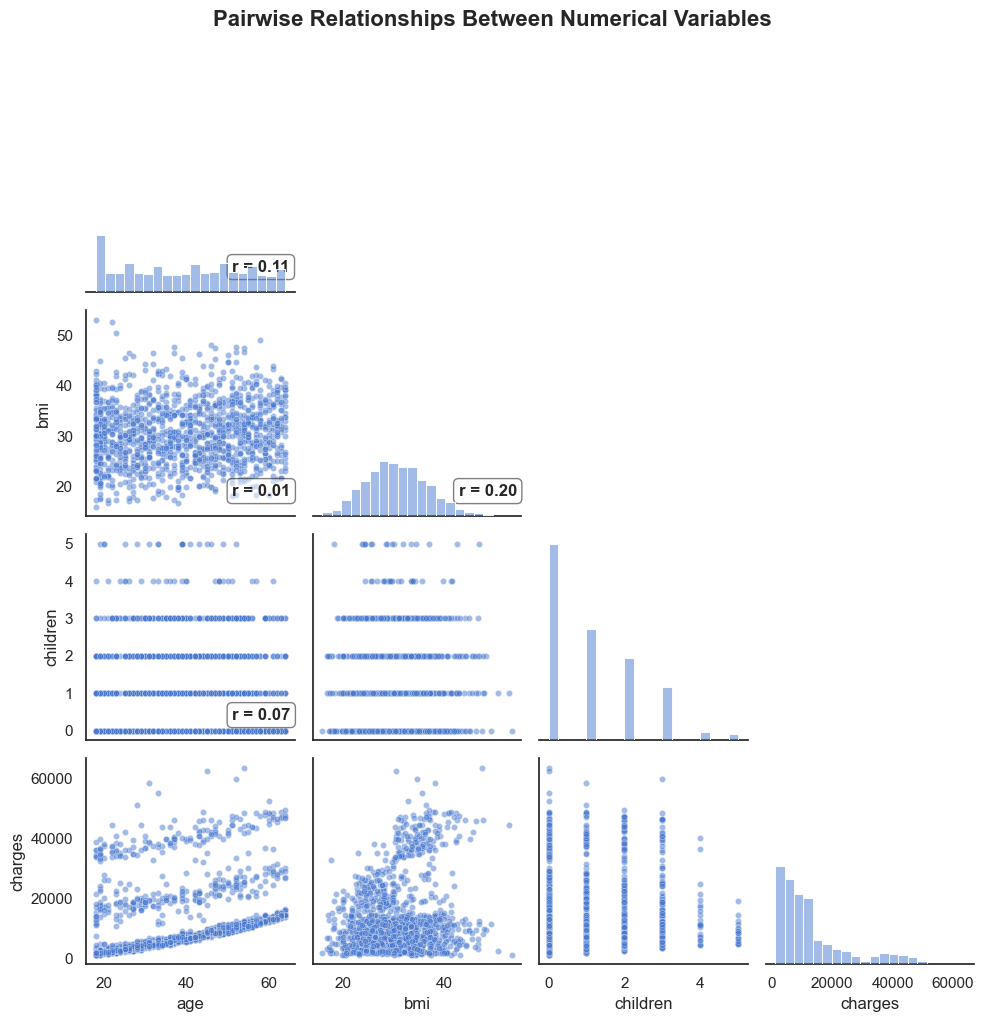

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 10))
g = sns.pairplot(insurance_csv, diag_kind='hist', corner=True, plot_kws={'alpha':0.5, 's':20}, diag_kws={'bins':20, 'alpha':0.5})
g.fig.suptitle('Pairwise Relationships Between Numerical Variables', fontsize=16, fontweight='bold', y=1.02)

# cols = insurance_csv.select_dtypes(include=[np.number]).columns
# for i in range(len(cols)):
#     for j in range(i+1, len(cols)):
#         ax = g.axes[i, j-i-1]  # Use j-i-1 for corner=True
#         if ax is not None:
#             corr = insurance_csv[cols[i]].corr(insurance_csv[cols[j]])
#             ax.text(0.7, 0.1, f'r = {corr:.2f}',
#                     transform=ax.transAxes,
#                     fontsize=12, fontweight='bold',
#                     bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

plt.tight_layout()
plt.show()
plt.clf()

Along the slope of the plot, we can see the distribution of each of our quantitative variables. 
- Age has a mostly uniform distribution, with a spike in the youngest bin (18-20 years).
- BMI has a normal distribution with a mean of 30.6.
- Children has a right-skewed distribution, with the average person within this dataset having 1 child.
- Charges, or insurance cost, also has a right-skewed distribution.

When examining the relationships between different variables, there seems to be a positive correlation between age and insurance cost.

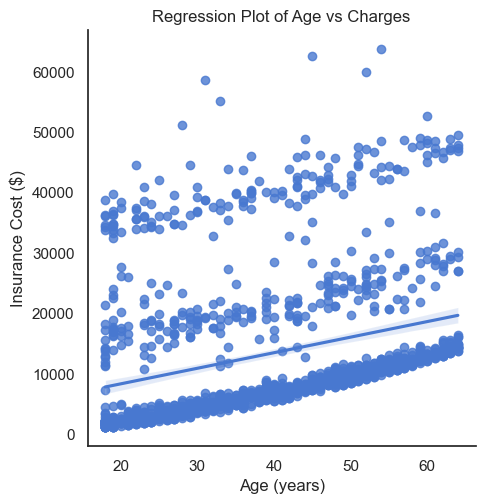

Slope: 257.72
Intercept: $3165.89
Regression Equation: Charges = 3165.89 + 257.72 × Age
Correlation Coefficient (r): 0.299
R-squared (R²): 0.089
Standard Error: 22.50
P-value: 4.89e-29
Statistical Significance: Yes (p < 0.001)


<Figure size 640x480 with 0 Axes>

In [94]:
# Linear Regression
age_model = LinearRegression()
age_model.fit(insurance_csv[['age']], insurance_csv['charges'])
age_slope = age_model.coef_[0]
age_intercept = age_model.intercept_
r_squared = age_model.score(insurance_csv[['age']], insurance_csv['charges'])

linregress_results = stats.linregress(insurance_csv['age'], insurance_csv['charges'])
p_value = linregress_results.pvalue
std_error = linregress_results.stderr
correlation = linregress_results.rvalue

sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True)
plt.title('Regression Plot of Age vs Charges')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

print(f"Slope: {age_slope:.2f}")
print(f"Intercept: ${age_intercept:.2f}")
print(f"Regression Equation: Charges = {age_intercept:.2f} + {age_slope:.2f} × Age")
print(f"Correlation Coefficient (r): {correlation:.3f}")
print(f"R-squared (R²): {r_squared:.3f}")
print(f"Standard Error: {std_error:.2f}")
print(f"P-value: {p_value:.2e}")
print(f"Statistical Significance: {'Yes (p < 0.001)' if p_value < 0.001 else 'No'}")

Above I plotted a linear regression to examine the relationship between the age of the insured and their insurance costs. While the p-value is essentially zero, showing that the positive relationship between age and insurance cost is statistically significant, the R^2 value is only 8.9%. This suggests that age *alone* is a weak predictor of insurance cost. The large amount of residual variation could mean that other factors, in combination with age, work to drive increased insurance costs.

Next, let's look further into the age of the insured and see if other variables might help explain insurance charges.

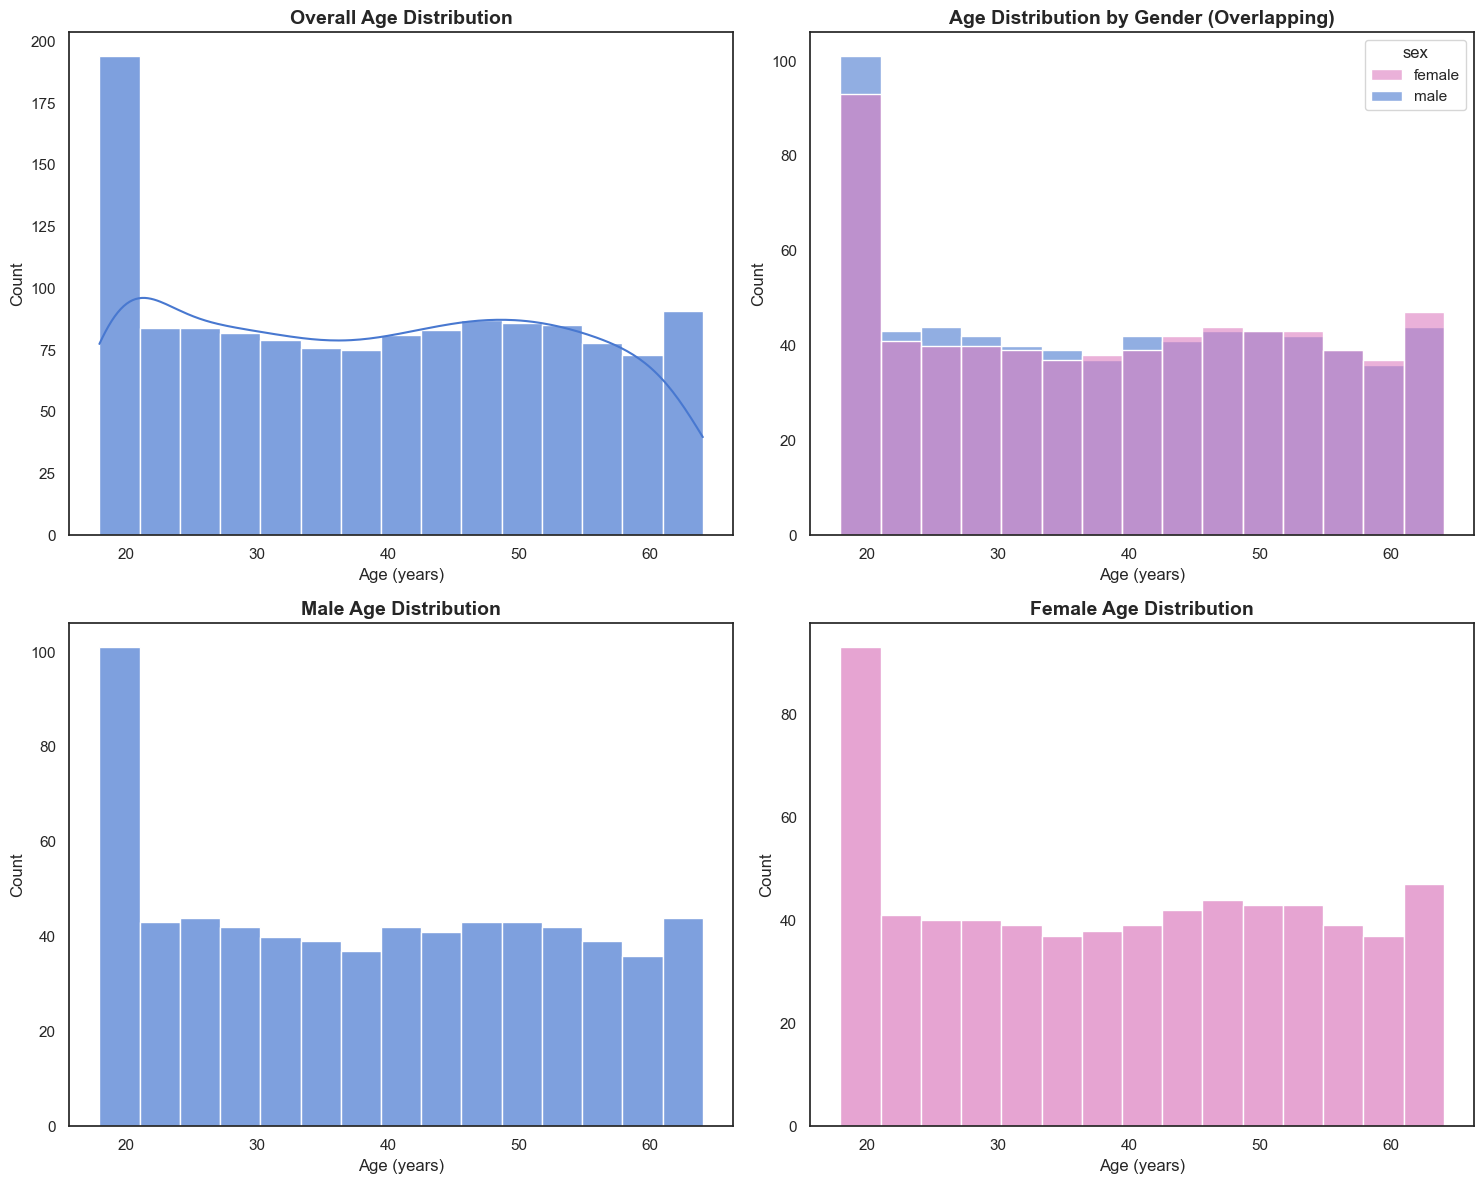

In [102]:
sns.set_palette('muted')
muted_colors = sns.color_palette('muted')

# Create the figure layout (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Overall age distribution
sns.histplot(data=insurance_csv, x='age', bins=15, kde=True, alpha=0.7, color=muted_colors[0], ax=axes[0,0])
axes[0,0].set_title('Overall Age Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age (years)')
axes[0,0].set_ylabel('Count')

# Age distribution by gender - overlapping
sns.histplot(data=insurance_csv, x='age', hue='sex', bins=15, alpha=0.6, 
             palette={'male': muted_colors[0], 'female': muted_colors[6]}, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Gender (Overlapping)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Age (years)')
axes[0,1].set_ylabel('Count')

# Age distribution by gender - separate facets
sns.histplot(data=insurance_csv[insurance_csv['sex'] == 'male'], x='age', 
             bins=15, color=muted_colors[0], alpha=0.7, ax=axes[1,0])
axes[1,0].set_title('Male Age Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Age (years)')
axes[1,0].set_ylabel('Count')

sns.histplot(data=insurance_csv[insurance_csv['sex'] == 'female'], x='age', 
             bins=15, color=muted_colors[6], alpha=0.7, ax=axes[1,1])
axes[1,1].set_title('Female Age Distribution', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Age (years)')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Above we see that age is uniformly distributed across both genders. Additionally, there is no significant difference in age distributions between male and female, providing us with a good gender balance for downstream analysis.

Next, I will examine whether dividing the data by gender has an effect on the age/insurance cost relationship.

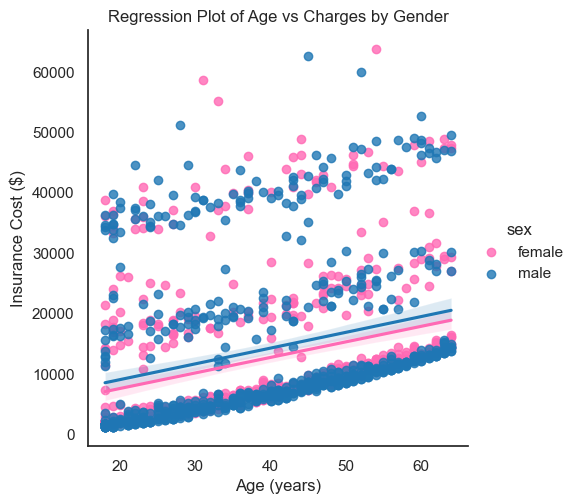

            Metric      Male    Female
0      Sample Size       676       662
1   Slope ($/year)    260.68    257.01
2    Intercept ($)   3811.77   2416.85
3        R-squared     0.080     0.105
4  Correlation (r)     0.282     0.325
5          p-value  7.39e-14  1.05e-17
6   Standard Error     34.11     29.15


<Figure size 640x480 with 0 Axes>

In [ ]:
# Gender-specific regression analysis
# Separate data by sex
male_data = insurance_csv[insurance_csv['sex'] == 'male'].copy()
female_data = insurance_csv[insurance_csv['sex'] == 'female'].copy()

# Fit regression models
male_model = LinearRegression()
female_model = LinearRegression()

male_model.fit(male_data[['age']], male_data['charges'])
female_model.fit(female_data[['age']], female_data['charges'])

male_stats = stats.linregress(male_data['age'], male_data['charges'])
female_stats = stats.linregress(female_data['age'], female_data['charges'])

# Plot
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='sex', palette={'male': '#1f77b4', 'female': '#ff69b4'})
plt.title('Regression Plot of Age vs Charges by Gender')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

# Results table
gender_results = {
    'Metric':['Sample Size', 'Slope ($/year)', 'Intercept ($)', 'R-squared', 'Correlation (r)', 'p-value', 'Standard Error'],
    'Male': [
        len(male_data),
        f"{male_stats.slope:.2f}",
        f"{male_stats.intercept:.2f}",
        f"{male_stats.rvalue**2:.3f}",
        f"{male_stats.rvalue:.3f}",
        f"{male_stats.pvalue:.2e}",
        f"{male_stats.stderr:.2f}"
    ],
    'Female': [
        len(female_data),
        f"{female_stats.slope:.2f}",
        f"{female_stats.intercept:.2f}",
        f"{female_stats.rvalue**2:.3f}",
        f"{female_stats.rvalue:.3f}",
        f"{female_stats.pvalue:.2e}",
        f"{female_stats.stderr:.2f}"
    ]
}

gender_results_df = pd.DataFrame(gender_results)
print(gender_results_df)

When we plot the linear regression of insurance costs by age for male and female clients, we can see that the differences in cost are minimal. The slope of both male and female regressions are essentially the same, showing that age does not impact costs of one gender more than the other. Additionally, the R^2 values for male and female clients are 8.0% and 10.5%, respectively. Thus, gender does not significantly impact the age/insurance cost relationship and that the weak predictive power of age alone applies to both genders.

<Figure size 1000x800 with 0 Axes>

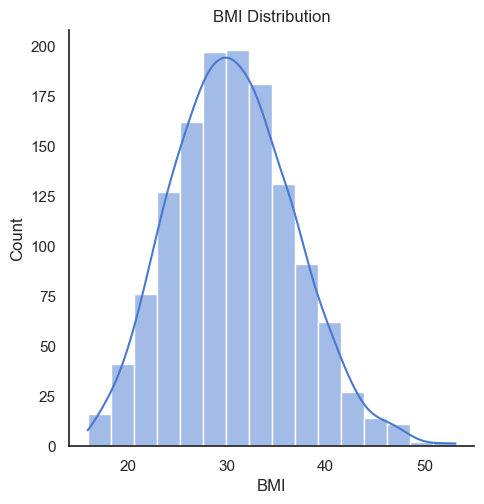

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize = (10, 8))
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.displot(insurance_csv['bmi'], bins = 16, color = 'b', kde = True)
plt.title("BMI Distribution")
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()
plt.clf()

<Figure size 1000x800 with 0 Axes>

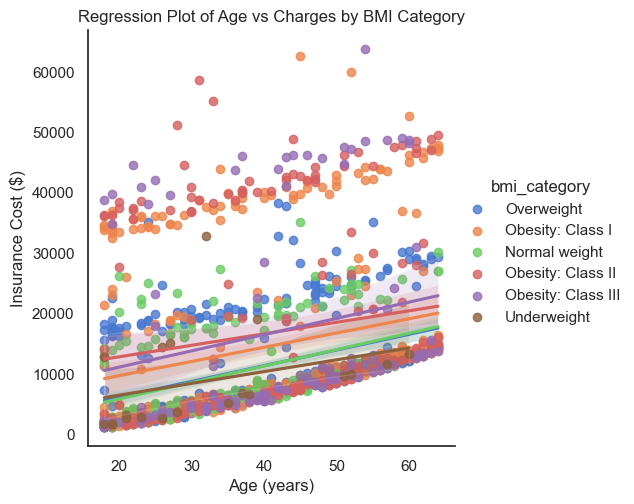

         BMI Category       Slope    Intercept        R²             p
0         Underweight  195.222558  2536.750834  0.115750  1.421732e-01
1       Normal weight  272.322987   372.243292  0.245699  3.623433e-15
2          Overweight  259.930961   921.299282  0.189524  9.963691e-19
3    Obesity: Class I  235.823633  4946.299100  0.063145  5.500593e-07
4   Obesity: Class II  190.478524  8982.762788  0.034271  5.663254e-03
5  Obesity: Class III  269.042829  5699.844713  0.051332  1.581633e-02


<Figure size 640x480 with 0 Axes>

In [62]:
bmi_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obesity: Class I', 'Obesity: Class II', 'Obesity: Class III']
bmi_category = []
for i in insurance_csv['bmi']:
    if i < 18.5:
        bmi_category.append('Underweight')
    elif 18.5 <= i < 24.9:
        bmi_category.append('Normal weight')
    elif 25 <= i < 29.9:
        bmi_category.append('Overweight')
    elif 30 <= i < 34.9:
        bmi_category.append('Obesity: Class I')
    elif 35 <= i < 39.9:
        bmi_category.append('Obesity: Class II')
    else:
        bmi_category.append('Obesity: Class III')
insurance_csv['bmi_category'] = bmi_category

results = []
for category in bmi_categories:
    data = insurance_csv[insurance_csv['bmi_category'] == category]
    if len(data) > 0:
        model = LinearRegression()
        model.fit(data[['age']], data['charges'])
        r_sq = model.score(data[['age']], data['charges'])
        slope = model.coef_[0]
        intercept = model.intercept_
        p_value = stats.linregress(data['age'], data['charges']).pvalue
        results.append({
            'BMI Category': category,
            'Slope': slope,
            'Intercept': intercept,
            'R²': r_sq,
            'p': p_value
        })

bmi_df = pd.DataFrame(results)

plt.figure(figsize=(10, 8))
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='bmi_category')
plt.title('Regression Plot of Age vs Charges by BMI Category')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

print(bmi_df)

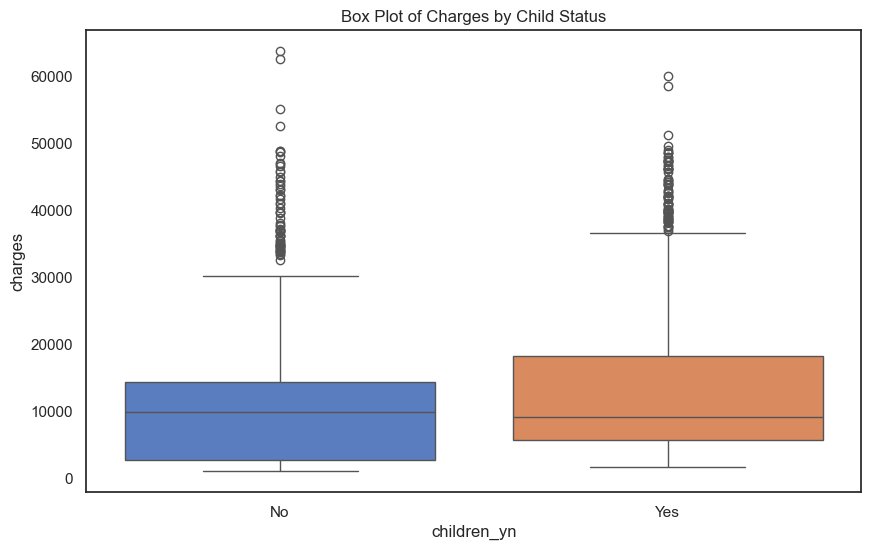

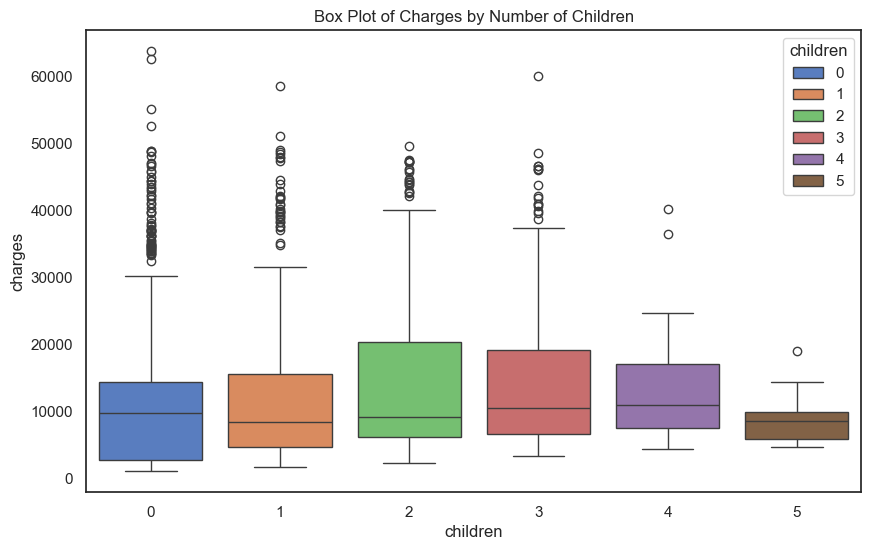

In [106]:
# Simplify the children column to Yes/No
insurance_csv['children_yn'] = insurance_csv['children'].apply(lambda x: 'Yes' if x >= 1 else 'No')

# Analyze the effect of children on charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='children_yn', y='charges', data=insurance_csv, palette='muted', hue=insurance_csv['children_yn'])
plt.title('Box Plot of Charges by Child Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=insurance_csv, palette='muted', hue=insurance_csv['children'])
plt.title('Box Plot of Charges by Number of Children')
plt.show()

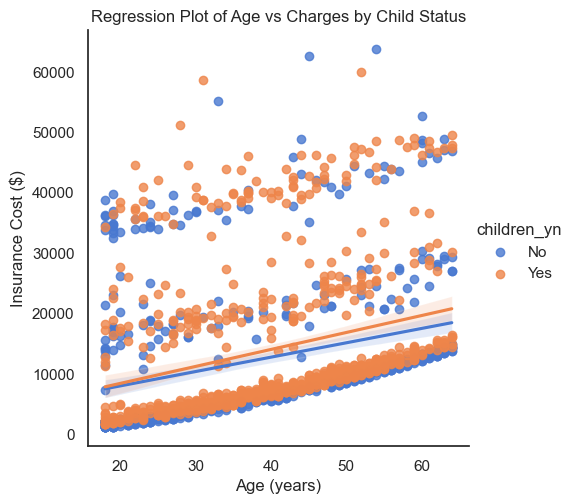

            Metric No Children Yes Children
0      Sample Size         574          764
1   Slope ($/year)      237.93       280.95
2    Intercept ($)     3219.04      2773.64
3        R-squared       0.106        0.076
4  Correlation (r)       0.325        0.276
5          p-value    1.31e-15     7.87e-15
6   Standard Error       28.92        35.43


<Figure size 640x480 with 0 Axes>

In [108]:
# Child-status regression analysis
# Divide data by child status
yes_child_data = insurance_csv[insurance_csv['children_yn'] == 'Yes'].copy()
no_child_data = insurance_csv[insurance_csv['children_yn'] == 'No'].copy()

# Fit regression
yes_child_model = LinearRegression()
no_child_model = LinearRegression()

yes_child_model.fit(yes_child_data[['age']], yes_child_data['charges'])
no_child_model.fit(no_child_data[['age']], no_child_data['charges'])

yes_child_stats = stats.linregress(yes_child_data['age'], yes_child_data['charges'])
no_child_stats = stats.linregress(no_child_data['age'], no_child_data['charges'])

# Plot
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='children_yn')
plt.title('Regression Plot of Age vs Charges by Child Status')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

# Results
child_results = {
    'Metric': ['Sample Size', 'Slope ($/year)', 'Intercept ($)', 'R-squared', 'Correlation (r)', 'p-value', 'Standard Error'],
    'No Children': [
        len(no_child_data),
        f"{no_child_stats.slope:.2f}",
        f"{no_child_stats.intercept:.2f}",
        f"{no_child_stats.rvalue**2:.3f}",
        f"{no_child_stats.rvalue:.3f}",
        f"{no_child_stats.pvalue:.2e}",
        f"{no_child_stats.stderr:.2f}"
    ],
    'Yes Children': [
        len(yes_child_data),
        f"{yes_child_stats.slope:.2f}",
        f"{yes_child_stats.intercept:.2f}",
        f"{yes_child_stats.rvalue**2:.3f}",
        f"{yes_child_stats.rvalue:.3f}",
        f"{yes_child_stats.pvalue:.2e}",
        f"{yes_child_stats.stderr:.2f}"
    ]
}
child_results_df = pd.DataFrame(child_results)
print(child_results_df)

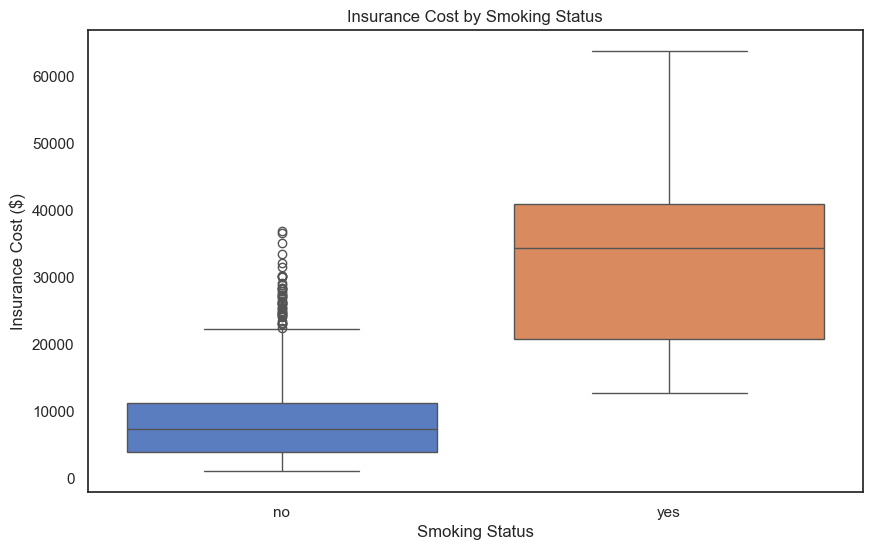

Median cost for smokers: $34456.35
Median cost for non-smokers: $7345.41


In [109]:
# Plot smoking status against charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_csv, order=['no', 'yes'], hue=insurance_csv['smoker'], hue_order=['no', 'yes'])
plt.title('Insurance Cost by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Insurance Cost ($)')
plt.show()

smoker_median_charges = insurance_csv[insurance_csv['smoker'] == 'yes']['charges'].median()
non_smoker_median_charges = insurance_csv[insurance_csv['smoker'] == 'no']['charges'].median()
print(f"Median cost for smokers: ${smoker_median_charges:.2f}")
print(f"Median cost for non-smokers: ${non_smoker_median_charges:.2f}")

<Figure size 1000x600 with 0 Axes>

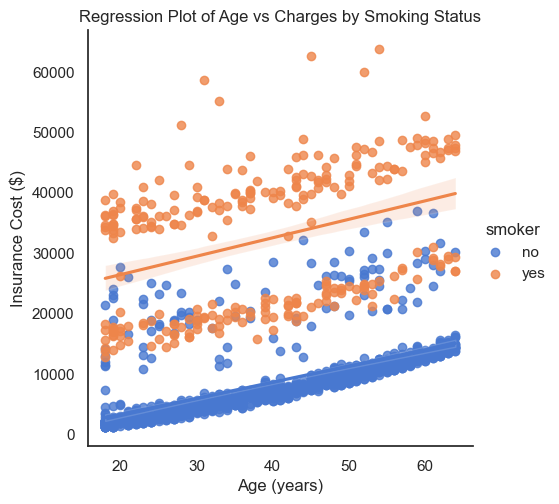

            Metric  Nonsmoker    Smoker
0      Sample Size       1064       274
1   Slope ($/year)     267.25    305.24
2    Intercept ($)   -2091.42  20294.13
3        R-squared      0.394     0.136
4  Correlation (r)      0.628     0.368
5          p-value  9.17e-118  3.18e-10
6   Standard Error      10.16     46.73


In [ ]:
# Regression of age vs charges by smoking status
# Divide the data by smoking status
smoker_data = insurance_csv[insurance_csv['smoker'] == 'yes']
nonsmoker_data = insurance_csv[insurance_csv['smoker'] == 'no']

# Fit the model
smoker_model = LinearRegression()
nonsmoker_model = LinearRegression()

smoker_model.fit(smoker_data[['age']], smoker_data['charges'])
nonsmoker_model.fit(nonsmoker_data[['age']], nonsmoker_data['charges'])

smoker_stats = stats.linregress(smoker_data['age'], smoker_data['charges'])
nonsmoker_stats = stats.linregress(nonsmoker_data['age'], nonsmoker_data['charges'])

# Plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='smoker', hue_order=['no', 'yes'])
plt.title('Regression Plot of Age vs Charges by Smoking Status')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()

# Results table
smoker_results = {
    'Metric': ['Sample Size', 'Slope ($/year)', 'Intercept ($)', 'R-squared', 'Correlation (r)', 'p-value', 'Standard Error'],
    'Nonsmoker': [
        len(nonsmoker_data),
        f"{nonsmoker_stats.slope:.2f}",
        f"{nonsmoker_stats.intercept:.2f}",
        f"{nonsmoker_stats.rvalue**2:.3f}",
        f"{nonsmoker_stats.rvalue:.3f}",
        f"{nonsmoker_stats.pvalue:.2e}",
        f"{nonsmoker_stats.stderr:.2f}"
    ],
    'Smoker': [
        len(smoker_data),
        f"{smoker_stats.slope:.2f}",
        f"{smoker_stats.intercept:.2f}",
        f"{smoker_stats.rvalue**2:.3f}",
        f"{smoker_stats.rvalue:.3f}",
        f"{smoker_stats.pvalue:.2e}",
        f"{smoker_stats.stderr:.2f}"
    ]
}
smoker_results_df = pd.DataFrame(smoker_results)
print(smoker_results_df)